## <font face = 'Century'>Actividad 1:
### Implementación de una red neuronal multicapa (MLP)

<font face = 'Century'>

- Crear una red neuronal simple en Python utilizando TensorFlow o Keras.

- Definir la arquitectura de la red con capas de entrada, ocultas y salida.

- Entrenar la red con un conjunto de datos básico (por ejemplo, el conjunto de datos MNIST).

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

#### <font face = 'Century'>**MNIST Data**

<font face = 'Century'>Let's load and see the MNIST data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


Label: 5


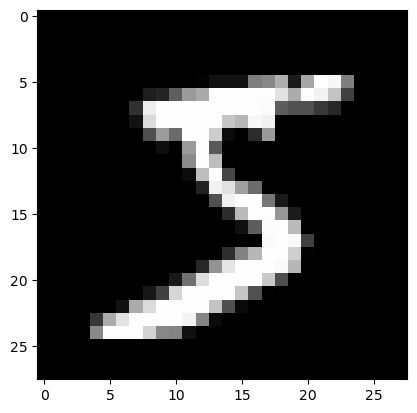

In [4]:
plt.imshow(X_train[0], cmap='gray')
print('Label:', y_train[0])

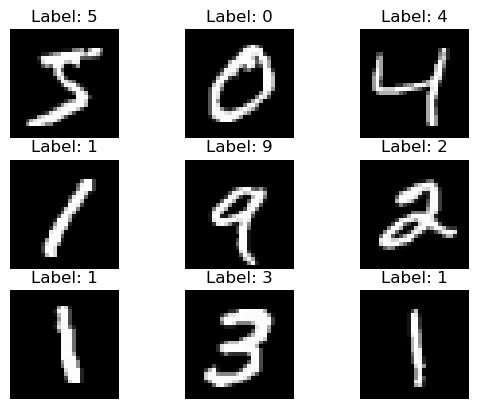

In [5]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title('Label: ' + str(y_train[i]))
    plt.axis('off')

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

##### <font face = 'Century'>**Data preprocessing:**

- <font face = 'Century'>Data normalization

In [7]:
X_train = X_train / 255.0   
X_test = X_test / 255.0

- <font face = 'Century'>Data Split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_val.shape

((48000, 28, 28), (12000, 28, 28))

#### <font face = 'Century'> **Model** 

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.2288 - accuracy: 0.9323 - val_loss: 0.1252 - val_accuracy: 0.9610
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0927 - accuracy: 0.9709 - val_loss: 0.0848 - val_accuracy: 0.9749
Epoch 3/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0619 - accuracy: 0.9805 - val_loss: 0.0945 - val_accuracy: 0.9729
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0471 - accuracy: 0.9851 - val_loss: 0.0963 - val_accuracy: 0.9728
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.0861 - val_accuracy: 0.9753
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.1101 - val_accuracy: 0.9705
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0853 - val_accu

#### <font face = 'Century'>**Model Evaluation**

Text(0.5, 1.0, 'Loss')

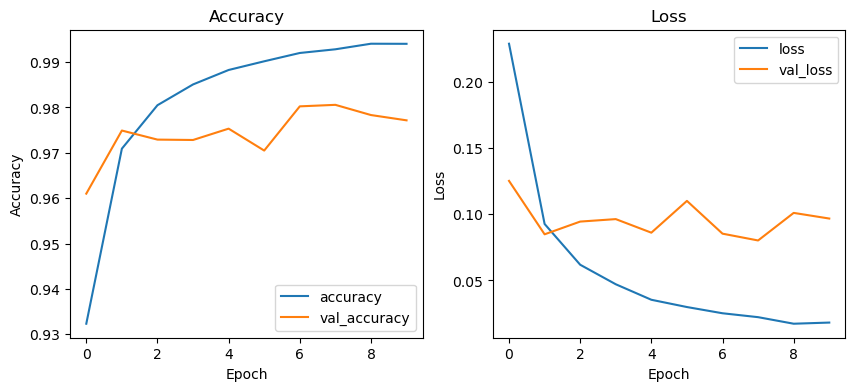

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Accuracy
plt.title('Model Performance')
axs[0].plot(history.history['accuracy'], label='accuracy')
axs[0].plot(history.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title("Accuracy")

# Loss
axs[1].plot(history.history['loss'], label='loss')
axs[1].plot(history.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].set_title("Loss")

In [17]:
test = model.evaluate(X_test, y_test)
print('Test loss:', test[0])

313/313 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9769
Test loss: 0.09239762276411057


In [18]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 2ms/step


Actual Label: 7
Prediction: 7


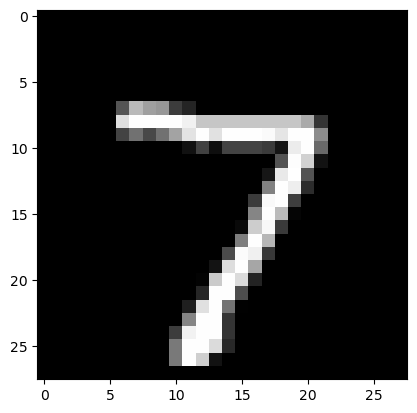

In [19]:
plt.imshow(X_test[0], cmap='gray')
print('Actual Label:', y_test[0])
print('Prediction:', predictions[0])

## <font face = 'Century'>Actividad 2:
### Exploración de funciones de activación

<font face = 'Century'>

- Comparar diferentes funciones de activación (Sigmoid, Tanh, ReLU) en términos de su impacto en el rendimiento del modelo.

- Implementar cada función de activación en una red neuronal y analizar los resultados

- <font face = 'Century'> Sigmoid:

In [21]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation='sigmoid'))
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dense(10, activation='softmax'))

In [22]:
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.4305 - accuracy: 0.8794 - val_loss: 0.2208 - val_accuracy: 0.9346
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1767 - accuracy: 0.9478 - val_loss: 0.1523 - val_accuracy: 0.9527
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.1193 - accuracy: 0.9650 - val_loss: 0.1117 - val_accuracy: 0.9653
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0992 - val_accuracy: 0.9697
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0659 - accuracy: 0.9802 - val_loss: 0.0871 - val_accuracy: 0.9712
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0951 - val_accuracy: 0.9710
Epoch 7/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.0779 - val_accuracy

Text(0.5, 1.0, 'Loss')

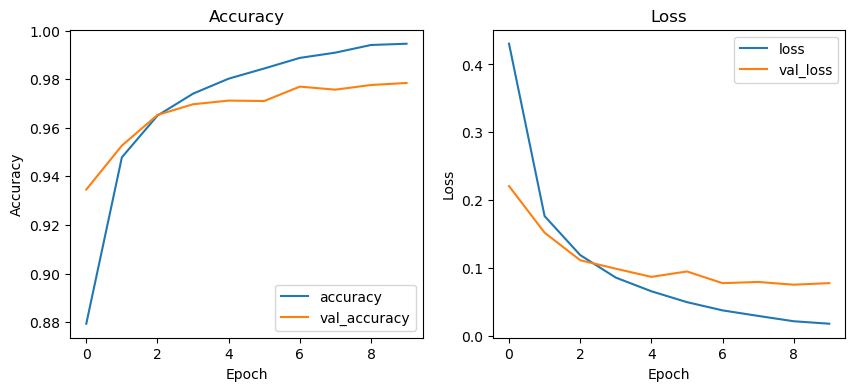

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Accuracy
plt.title('Model 2 Performance')
axs[0].plot(history2.history['accuracy'], label='accuracy')
axs[0].plot(history2.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title("Accuracy")

# Loss
axs[1].plot(history2.history['loss'], label='loss')
axs[1].plot(history2.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].set_title("Loss")

- SGD como nuevo optimizador con el modelo 1

In [30]:
model3 = Sequential()
model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [31]:
model3.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
history3 = model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.6489 - accuracy: 0.8351 - val_loss: 0.3346 - val_accuracy: 0.9055
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3054 - accuracy: 0.9129 - val_loss: 0.2690 - val_accuracy: 0.9222
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2531 - accuracy: 0.9281 - val_loss: 0.2315 - val_accuracy: 0.9341
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2193 - accuracy: 0.9369 - val_loss: 0.2118 - val_accuracy: 0.9392
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1925 - accuracy: 0.9450 - val_loss: 0.1888 - val_accuracy: 0.9469
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1724 - accuracy: 0.9503 - val_loss: 0.1741 - val_accuracy: 0.9501
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1559 - accuracy: 0.9554 - val_loss: 0.1622 - val_accuracy:

Text(0.5, 1.0, 'Loss')

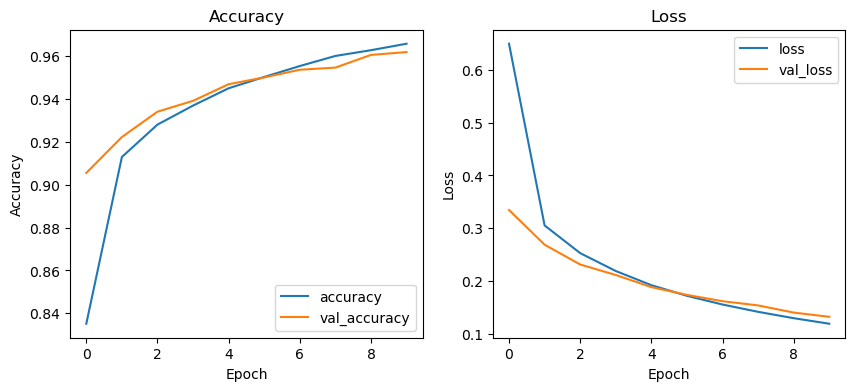

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Accuracy
plt.title('Model Performance (SGD)')
axs[0].plot(history3.history['accuracy'], label='accuracy')
axs[0].plot(history3.history['val_accuracy'], label = 'val_accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].set_title("Accuracy")

# Loss
axs[1].plot(history3.history['loss'], label='loss')
axs[1].plot(history3.history['val_loss'], label = 'val_loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].set_title("Loss")